# Credit Card Fraud Detection
the dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. There are 31 variables in the dataset from which 30 are independent variables and 1 is dependent variable which are explained below:

Independent Variables:
1. V1,V2...V28 : Due to privacy reason, variables ‘V1, V2, … V28’ are transformed with Principal Component Analysis (PCA)
2. Time: The variable 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
3. Amount:	The variable 'Amount' is the transaction amount

Dependent Variable:
1. Class: The dependent variable 'Class' is the response variable that has value 1 in case of fraud and 0 otherwise.


In [134]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [135]:
#loading the dataset
df=pd.read_csv("creditcard.csv")

In [63]:
#Displaying first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [138]:
#Calculating basic statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.shape

(284807, 31)

In [6]:
import sweetviz as sv

In [7]:
fraud_report = sv.analyze(df)

:FEATURES DONE:                    |█████████████████████| [100%]   01:38  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:38  -> (00:00 left)


Creating Associations graph... DONE!


In [8]:
fraud_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


From the sweetviz report, we can see that out of 31 features; except Class all other are numerical variables.There are 1081 duplicate rows in the dataset, we are not removing the duplicates because the data points might be important to detect fraud and there will be loss of fraud cases therefore it is safe to not remove the duplicates as it is the real data of the user.

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in the dataset

#### Detecting outliers in the dataset

In [13]:
#Detecting outliers using Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(df.drop('Class',axis=1),0,list(df.drop('Class',axis=1)))
df.drop('Class',axis=1).loc[Outliers_to_drop]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,...,-1.270478,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,2.962484,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284656,172650.0,1.653631,-0.513256,-2.156736,1.219667,0.710410,-0.090590,0.679705,-0.154234,0.052623,...,0.100606,0.174375,0.181311,-0.196528,0.214063,0.411099,-0.530897,-0.065595,-0.037701,202.24
284664,172658.0,1.547974,-0.649568,-1.847687,0.646965,-0.096656,-1.085343,0.491017,-0.371933,0.872821,...,0.358818,-0.088008,-0.488775,-0.039812,-0.163361,-0.130377,-0.109957,-0.043893,0.021675,252.85
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,0.384053,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.418581,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54


The outliers detected are 134873 which is almost half of the dataset. For this dataset, removing outliers is not the good idea because it represent the actual data of the people spending money, therefore data might be scattered. 

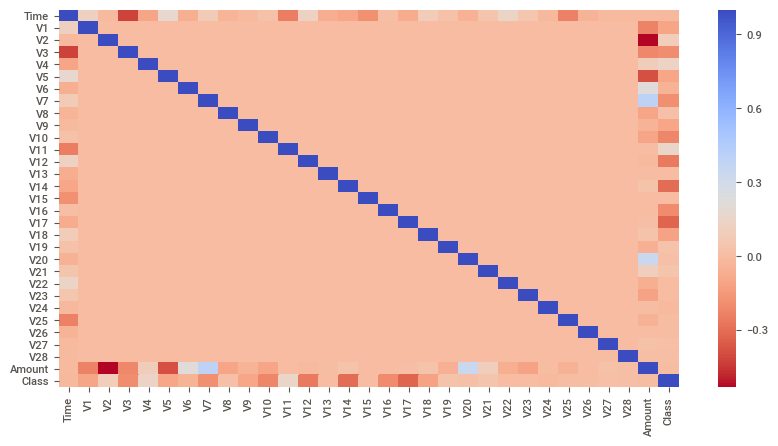

In [14]:
#HeatMap to check correlation between all the variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="coolwarm_r")
plt.show()

From the heatmap, it looks like variables are not correlated with each other

0    284315
1       492
Name: Class, dtype: int64


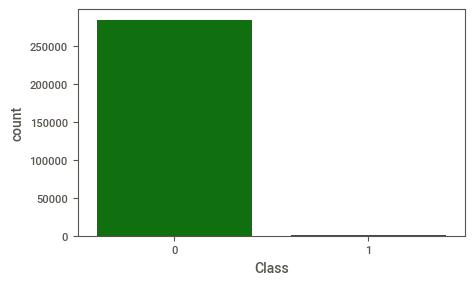

In [20]:
#Distribution of target variable income
color = sns.color_palette()
plt.subplots(figsize=(5,3))
print(df['Class'].value_counts())
sns.countplot(x= 'Class', data=df,color='g')
plt.show()

The target variable class is not balanced. There are only 0.17% of the fraud cases compare to 99.83% of the normal transaction.

In [139]:
# % distribution of class 0 i.e. no fraud and class 1 i.e. fraud
(df["Class"].value_counts()*100)/len(df)

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [74]:
#Storing the series of fraud and no fraud in dataframe for visualization purpose
Fraud_transaction = df[df["Class"]==1]
Normal_transaction= df[df["Class"]==0]

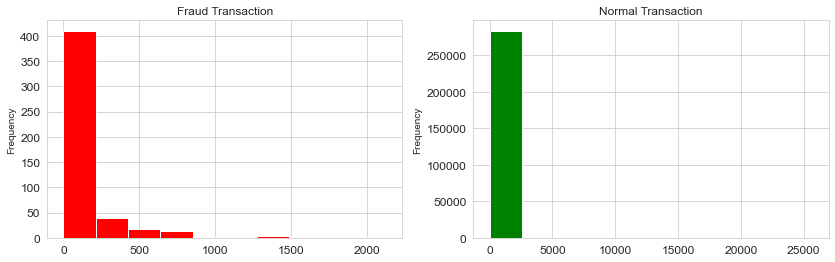

In [147]:
#Analysis of the amount where fraud and no fraud occurs
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
Fraud_transaction.Amount.plot.hist(title="Fraud Transaction",color='r',fontsize=12)
plt.subplot(1,2,2)
Normal_transaction.Amount.plot.hist(title="Normal Transaction",color='g',fontsize=12)
plt.show()

The amount on x-axis ranges differently on both the plots. Therefore, its hard to compare. The amount is restricted to 2500 in below figure to understand the distibution better.

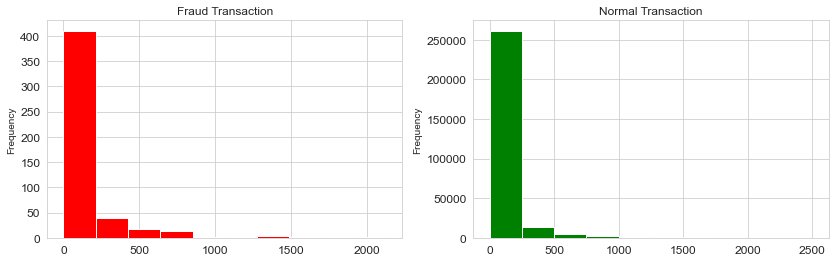

In [148]:
#Analysis of the amount where fraud and no fraud occurs with restriction
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
Fraud_transaction[Fraud_transaction["Amount"]<= 2500].Amount.plot.hist(title="Fraud Transaction",color='r',fontsize=12)
plt.subplot(1, 2, 2)
Normal_transaction[Normal_transaction["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction",color='g',fontsize=12)
plt.show()

From the graph, we can see that the distribution of both the graph is almost similar but there is slightly larger amount for fraudelent transaction 

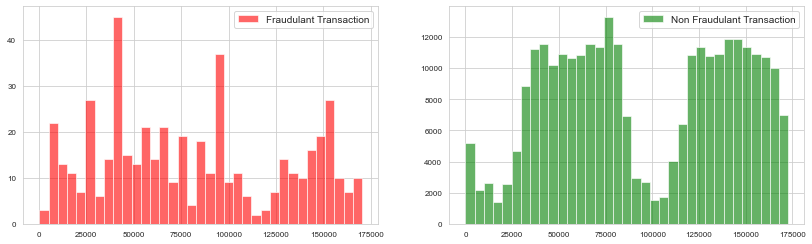

In [155]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
Fraud_transaction.Time.hist(bins=35, color='r', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(1, 2, 2)
Normal_transaction.Time.hist(bins=35, color='g', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

The distribution of both the graph is skewed. It depicts that time of the day does not really matter when fraud occurs or not.

<Figure size 432x288 with 0 Axes>

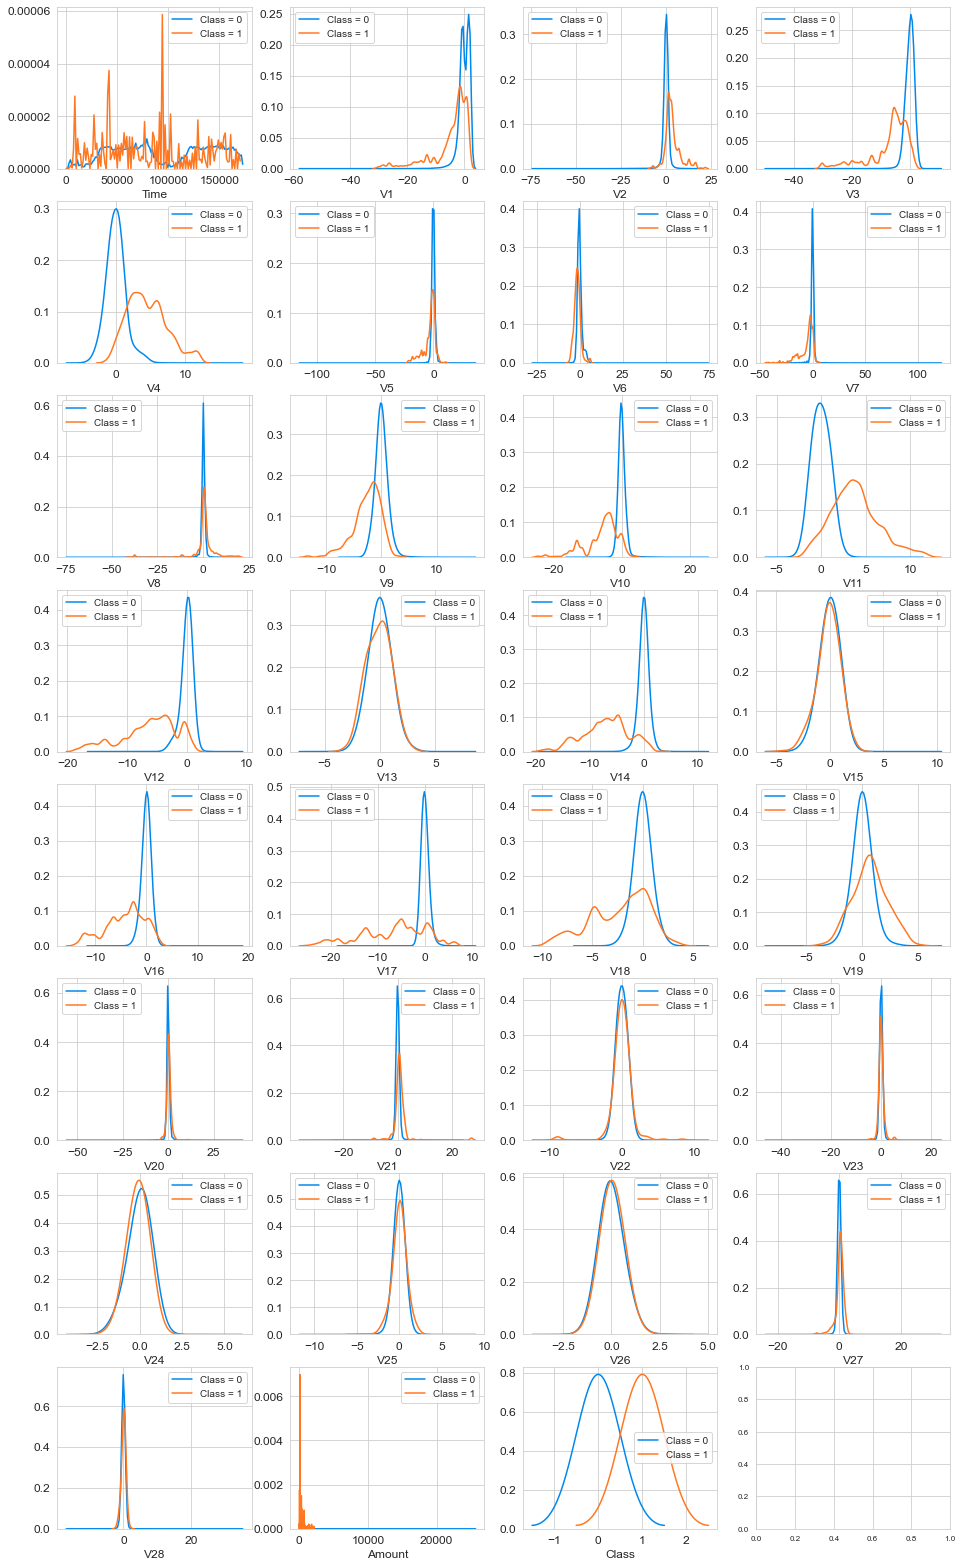

In [113]:
#Constructing plot for all the variables

np.seterr(divide='ignore', invalid='ignore',under='ignore') #To ignore the error

var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Summary of the plots
1. Variables V4 and V11 have clearly separated distribution for class 0(normal transaction) and class 1 (fraud transaction)
2. Variables V12, V14, V18 have partially seperated distribution for class 0 and class 1
3. Variable V26 has exactly same distribution for class 0 and class 1 whereas V24, V25, V27 and V28 have nearly same distribution for both classes
4. Variables Time and Amount have exceptional distribution than other variables
5. Variable Class shows the bell curve shape for both the class 0 (i.e. no fraud) and class 1 (i.e. fraud). However, for class 0, the data is centered at 0 whereas for class 1 data is shifted and centered around 1


# Feature Engineering
All the variables except Time and amount are transformed using Principal Component Analysis Technique.Therefore, it is vital for us to scale the Time and amount variable.To make our dataset uniform, various steps in feature engineering is conducted which are as follows:
1. The variables amount and time are scaled using Standard Scalar and stored in the new variables named scaled_amount and scaled_time
2. The original variables amount and time is dropped from the dataset to reduce ambuguity
3. The scaled_amount and scaled_time variable is added in the dataset

In [114]:
# Since most of our data has already been scaled we should scale the columns that are left to scale i.e Amount and Time
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaled_amount=sc.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time=sc.fit_transform(df['Time'].values.reshape(-1,1))


In [115]:
scaled_amount

array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [116]:
scaled_time

array([[-1.99658302],
       [-1.99658302],
       [-1.99656197],
       ...,
       [ 1.6419735 ],
       [ 1.6419735 ],
       [ 1.64205773]])

In [121]:
#Drop Time and Amount Variable
df.drop(['Time','Amount'], axis=1, inplace=True)

In [123]:
#insert scaled amount and time variable
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

In [124]:
# Amount and Time are Scaled in this new data
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Developing Base Model
To develop the model, dataset is divided into 80:20 ratio i.e. 80% of the data is used for training the model and 20% data is used to test the model.

As our problem falls into binary classification i.e. to detect fraud or no fraud, the logistic regression model is developed to predict the fraud cases.Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [131]:
#Defining x and y variable
X = df.drop('Class', axis=1)
y = df['Class']

#Create Training Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [132]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('\n', confusion_matrix(y_test,y_pred))  
print('\n',classification_report(y_test,y_pred,target_names=['No Fraud','Fraud'])) 


 [[56849    17]
 [   38    58]]

               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56866
       Fraud       0.77      0.60      0.68        96

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



The accuracy of the logistic regression model is 100% which is not useful because our class is not balanced.Our purpose is to detect fraud transaction, therefore we will see f1-score metric of fraud class which gives 68% score that indicates it is not very good and accurate model. The result of the score is subject to change because of the random selection of the data.

## Next Steps:
To improve the performance of the model, we need to resolve the issue of imbalance class so that model will not give bias result. In the next version of the project, different techniques will be used such as random under sampling and Synthetic Minority Oversampling Technique (SMOTE) will be used to improve the performance of the model.